In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

,SPY,TOPT,QQQ,QTOP,TQQQ,MAGS,MAGX,MAG7.L,NVDA,NVD3.L,TSLA,TSL3.L
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.027956,0.044089,0.038605,0.047466,0.115295,0.050100,0.106981,0.303870,0.097523,0.302571,0.114681,0.328775
2,0.041013,0.060468,0.056672,0.065499,0.168638,0.072910,0.156072,0.443780,0.148440,0.445619,0.174408,0.523312
3,0.050887,0.072838,0.070099,0.079853,0.208594,0.090506,0.192467,0.544769,0.186601,0.548458,0.222015,0.675589
4,0.058984,0.080709,0.081238,0.089449,0.240320,0.105340,0.225144,0.629596,0.218493,0.631523,0.260395,0.800202
5,0.066158,0.088931,0.090696,0.099180,0.267311,0.119085,0.255260,0.705766,0.245683,0.700791,0.292904,0.901965
6,0.072819,0.097802,0.099598,0.109397,0.292076,0.132107,0.285475,0.778308,0.270879,0.764203,0.322075,0.990383
7,0.079161,0.105060,0.108034,0.117720,0.315512,0.144121,0.313434,0.843581,0.295293,0.822203,0.348881,1.070264
8,0.084783,0.110100,0.115842,0.123514,0.336964,0.155533,0.340052,0.904149,0.318160,0.875142,0.375064,1.135465
9,0.090087,0.113595,0.122901,0.127407,0.356537,0.165970,0.364075,0.961081,0.339401,0.923981,0.397862,1.193318


<Axes: title={'center': 'Weekly Swing'}, xlabel='Weeks', ylabel='Swing'>

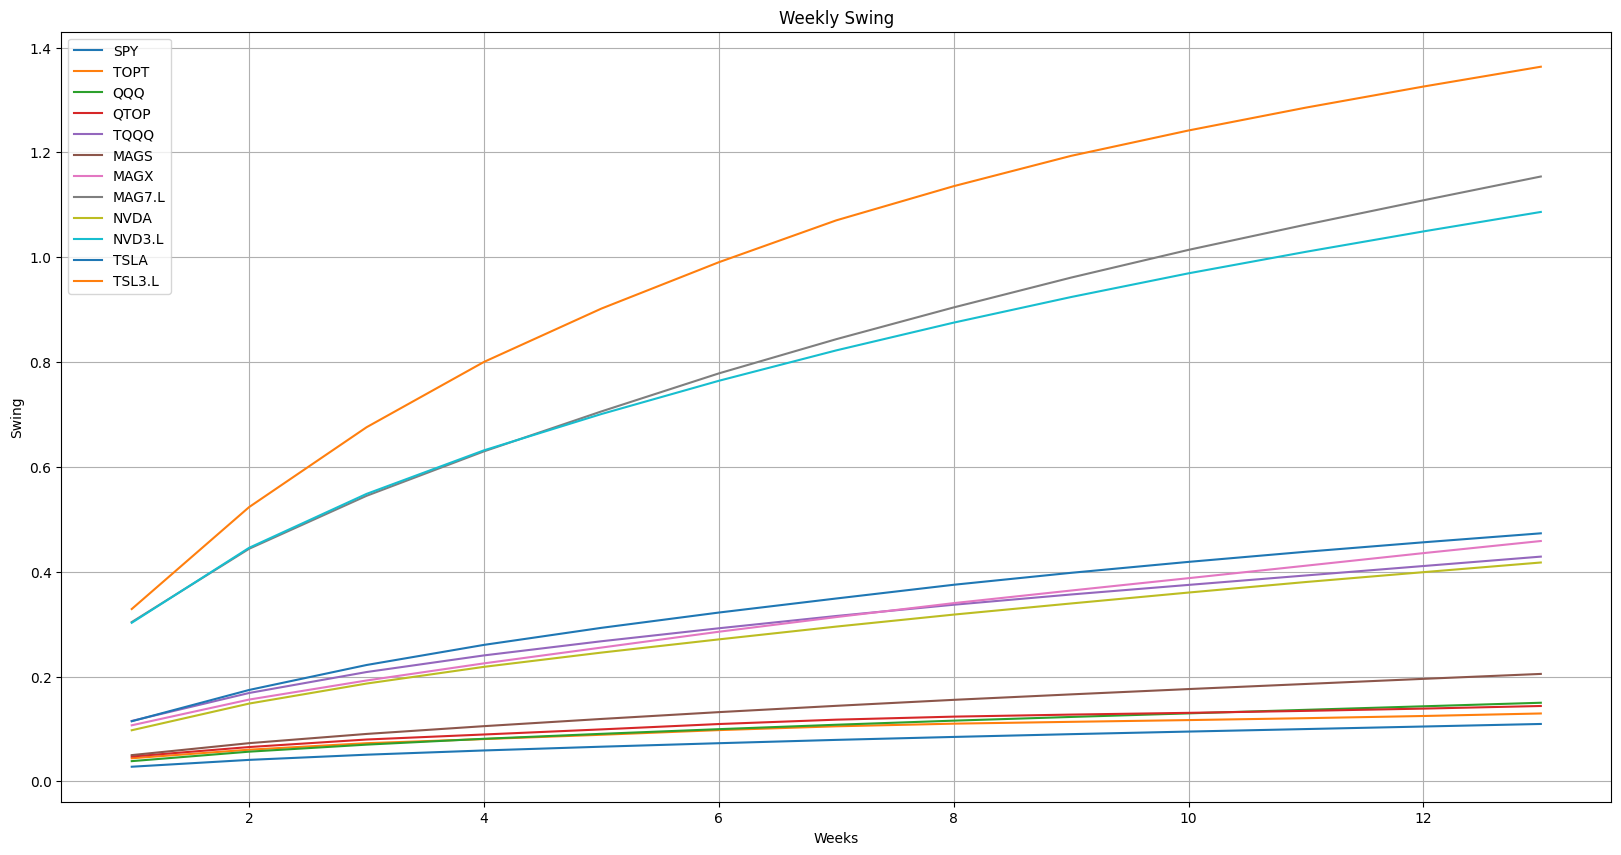

In [2]:
# start_date = '2020-01-01'
# start_date = '2021-01-01' # start of previous cycle
# start_date = '2022-01-01' # start of downtrend
start_date = '2023-01-01' # start of uptrend
# start_date = '2023-04-10' # start of MAGS history
# start_date = '2024-02-28' # start of MAGX history
# start_date = '2024-10-23' # start of TOPT & QTOP history
# start_date = '2025-01-01'

df = pd.DataFrame()
for symbol in [
    'SPY','TOPT',
    'QQQ','QTOP','TQQQ',
    # 'IGM','XLKS.MI','SMH','USD','FNGU','FNGS',
    'MAGS','MAGX','MAG7.L',
    'NVDA','NVD3.L',
    'TSLA','TSL3.L',
]:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today())
    rows = [None]
    for weeks in range(1, 14):
        whigh = history.High.rolling(window=weeks).max()
        wlow = history.Low.rolling(window=weeks).min()
        swing = 2*(whigh - wlow)/(whigh + wlow)
        rows.append(swing.mean())
    df[symbol] = rows

display(df)
df.plot(
    title='Weekly Swing',
    figsize=(20, 10),
    xlabel='Weeks',
    ylabel='Swing',
    grid=True,
)
